In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv("./Training Data/Linear_X_Train.csv")
y = pd.read_csv("./Training Data/Linear_Y_train.csv")

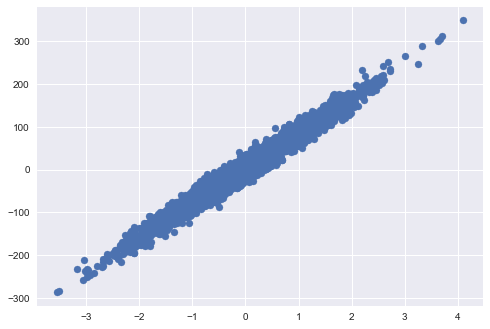

In [3]:
plt.style.use("seaborn")
plt.scatter(X,y)
plt.show()

In [4]:
X.shape,y.shape

((3750, 1), (3750, 1))

In [5]:
X = X.values
y = y.values

In [6]:
# Normalization
u = X.mean()
std = X.std()
X = (X-u)/std

In [7]:
def error(X,y,theta):
    m = X.shape[0]
    errors = (1/m)*sum((X.dot(theta)-y)**2)
    return errors
def gradient_descent(X,y):
    m = X.shape[0]
    eta = 0.1
    X = np.concatenate((np.ones((m,1)),X),axis = 1)
    num_iterations = 1000
    theta = np.random.randn(2,1)
    error_list=[]
    for i in range(num_iterations):
        grad = (2/m)*X.T.dot(X.dot(theta) - y)
        theta = theta - eta*grad
        error_list.append(error(X,y,theta))
    return theta,error_list

In [8]:
theta,error_list = gradient_descent(X,y)

In [13]:
theta

array([[ 0.68386897],
       [79.90573694]])

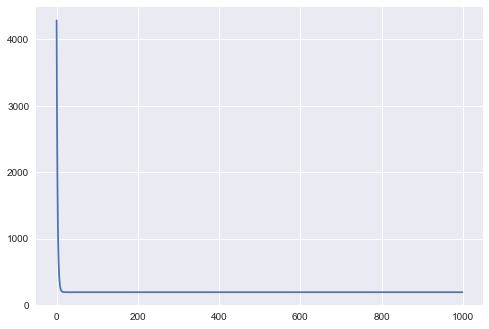

In [14]:
plt.plot(error_list)
plt.show()

In [15]:
def h(X,theta):
    m = X.shape[0]
    X = np.concatenate((np.ones((m,1)),X),axis = 1)
    return X.dot(theta)

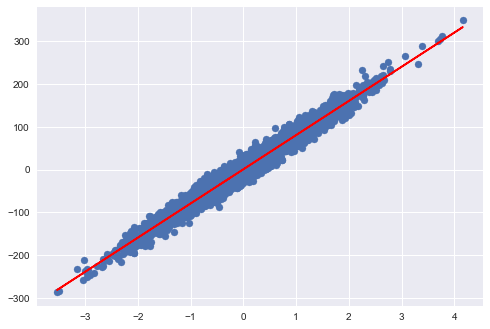

In [24]:
plt.scatter(X,y)
Y = h(X,theta)
plt.plot(X,Y,color="red")
plt.show()

In [25]:
X_test = pd.read_csv("./Test Cases/Linear_X_test.csv")

In [26]:
X_test.head()

,x
0,-1.877944
1,-0.869032
2,-2.530182
3,2.760205
4,0.591000


In [27]:
y_test = h(X_test,theta)

In [28]:
y_test

array([[-149.37466337],
       [ -68.7567667 ],
       [-201.49222227],
       ...,
       [  10.91242825],
       [ -21.53292954],
       [ -53.68602633]])

In [29]:
df = pd.DataFrame(data = y_test,columns = ['y'])

In [30]:
df.head()

,y
0,-149.374663
1,-68.756767
2,-201.492222
3,221.240119
4,47.908170


In [31]:
df.to_csv("my_predictions.csv",index = False)